<style>
.rendered_html * + p, .rendered_html p {
    text-align:justify;
}
.print {
    display:none;
}
.highlight {
    background:white;
}
@media print {
 a[href]:after {
     content: ""
 }
 .noprint {
  display:none
  }
  .print {
        display:block;
    }
}
</style>
<head>
    <base target="_blank">
</head>


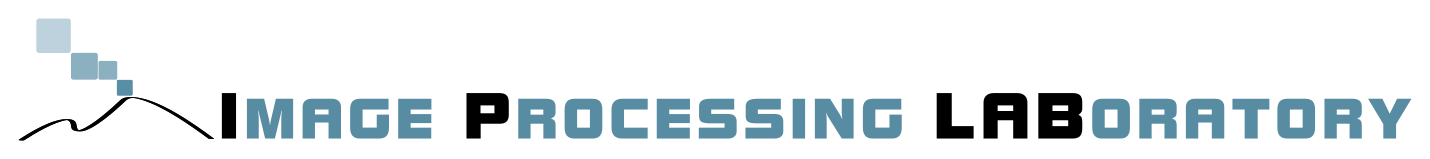

<center><h2>Deep Learning - A.A. 2021-2022</h2></center>
<center><h3>Reinforcement Learning</h3></center>
<br>
<center>Antonino Furnari - <a href="http://www.antoninofurnari.it/" target="_blank">http://www.antoninofurnari.it/</a> - <a href="mailto:furnari@dmi.unict.it">furnari@dmi.unict.it</a> </center>
<center>Giovanni Maria Farinella - <a href="http://www.dmi.unict.it/farinella/" target="_blank">http://www.dmi.unict.it/farinella/</a> - <a href="mailto:gfarinella@dmi.unict.it">gfarinella@dmi.unict.it</a> </center>

In questo laboratorio vedremo alcuni esempi di algoritmi di reinforcement learning. 

(Il materiale che segue è in parte ripreso da: https://spinningup.openai.com/en/latest/spinningup/rl_intro.html e da: https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html).

I principali attori nel reinforcement learning sono l'agente e l'ambiente. L'ambiente è il mondo in cui l'agente vive e con cui interagisce. Ad ogni passo dell'interazione, l'agente vede un'osservazione (anche parziale) dello stato del mondo, e poi sceglie un'azione da intraprendere. L'ambiente cambia quando l'agente agisce su di esso, ma può anche cambiare da solo.

L'agente ottiene anche una reward dall'ambiente, cioè un numero che indica quanto sia buono o cattivo lo stato attuale del mondo. L'obiettivo dell'agente è massimizzare la sua ricompensa cumulativa, chiamata rendimento. I metodi di apprendimento per rinforzo sono modi in cui l'agente può apprendere i comportamenti per raggiungere il suo obiettivo.

La figura seguente mostra uno schema del funzionamento degli algoritmi di reinforcement learning:
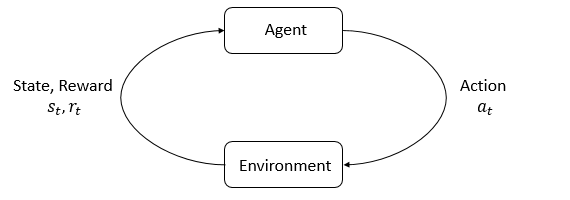

Altri termini importanti da conoscere per il reinforcement learning sono:
 
 * Stati: una descrizione completa dello stato dell'ambiente;
 * Osservazioni: una osservazione (anche parziale) di uno stato;
 * Policy: una regola usata dall'agente per intraprendere una azione in quando viene osservato un dato stato: $a_t = \pi (s_t)$;
 * Ritorno: un valore che cumula le reward $r_t$ ottenute al tempo $t$ su un orizzonte finito o infinito.
 
L'obiettivo di un algoritmo di reinforcement learning è in genere quello di apprendere una policy che cerchi di massimizzare il ritorno
$R_{t_0} = \sum_{t=t_0}^{\infty} \gamma^{t - t_0} r_t$. Il parametro di sconto, $\gamma$, è una costante tra $0$ e $1$ che permette di pesare maggiormente le reward ottenute più di recente rispetto a quelle ricevute più lontano nel passato.

## Q-Learning e Deep Q-Learning
L'idea principale alla base del Q-learning è quella di modellare una funzione $Q^*: Stato \times Azioni \rightarrow \mathbb{R}$, in grado di prevedere il valore di *return* qualora dovessimo scegliere una data azione in un dato stato. Se avessimo questa funzione, potremmo facilmente costruire una policy che massimizzi il ritorno:

\begin{align}\pi^*(s) = \arg\!\max_a \ Q^*(s, a)\end{align}

Il deep Q-Learning, in particolare, segue l'approccio di approssimare $Q^*$ mediante una rete neurale.

Per apprendere $Q$, sfrutteremo il fatto che la funzione $Q$ obbedisce all'equazione di Bellman:

\begin{align}Q(s, a) = r + \gamma Q(s', \pi(s'))\end{align}

Dove $s'$ è lo stato che si ottiene effettuando l'azione $a$ nello stato $s$.

La differenza tra i due lati dell'uguaglianza è nota come
errore di differenza temporale (temporal difference error), $\delta$:

\begin{align}\delta = Q(s, a) - (r + \gamma \max_a Q(s', a))\end{align}

In pratica, per evitare *catastrophic forgetting* (ovvero un fenomeno in cui il modello peggiora le proprie prestazioni su episodi vecchi man mano che apprende i nuovi), utilizzeremo una vecchia copia della rete che approssima $Q$ nel secondo membro dell'equazione precedente. La copia sarà aggiornata ogni $10$ episodi copiando i pesi della rete che apporssima $Q$ e verrà chiamata *target network*.

Minimizzare questo errore può essere visto come un problema di regressione risolvibile con una loss MSE $\mathcal{L}(\delta)$.

Calcoleremo l'errore su una serie di transizioni $B$ campionate mediante memory replay:

\begin{align}\mathcal{L} = \frac{1}{|B|}\sum_{(s, a, s', r) \ \in \ B} \mathcal{L}(\delta)\end{align}

## Cart Pole

Useremo come esempio per mostrare l'algoritmo di Deep Q-Learning, il task "CartPole". In questo task, l'agente comanda un carrello con un palo attaccato su mediante un perno. Ad ogni timestep l'agente dovrà scegliere tra due azioni: spostare il carrello a sinistra o spostare il carrello a destra, in modo che il palo posizionato sul carrello stia fermo (si veda: https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html).

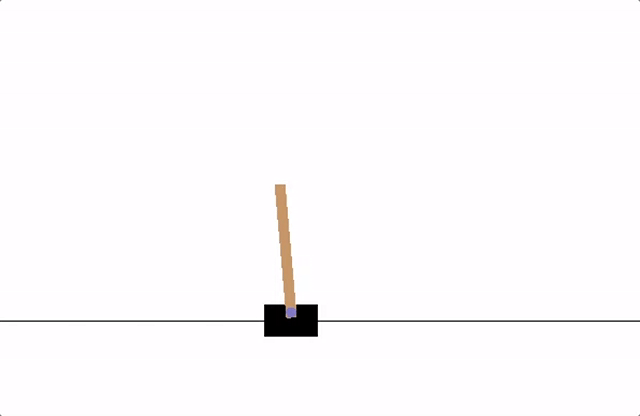

<div>
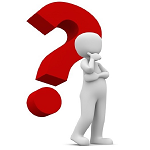
</div>

**Domanda 1**

Considerando l'immagine sopra, il carrello dovrebbe spostarsi a destra o a sinistra?

<div>
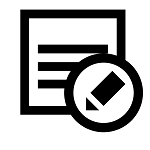
</div>

**Risposta 1**

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

In questo task, la reward ottenuta è +1 per ogni timestep in cui il palo resta in piedi, mentre l'episodio termina se il palo cade troppo lontano o se il carrello si sposta di più di 2.4 unità lontano dal centro. Ciò significa che gli scenari con prestazioni migliori verranno eseguiti per una durata maggiore, accumulando una reward maggiore.

In questo task, le osservazioni è un vettore di valori reali che contiene dati quali l'accelerazione e la velocità.

Per simulare gli episodi, utilizzremo `gym` (https://gym.openai.com/docs/), un toolkit pensato per l'allenamento di modelli di reinforcement learning. Possiamo installare `gym` con tutte le dipendenze con il comando:

`pip install gym[all]`

Possiamo trovare informazioni su questo task al seguente link: https://github.com/openai/gym/wiki/CartPole-v0. Ispezioniamo in particolare le azioni disponibili:

<table role="table">
<thead>
<tr>
<th>Num</th>
<th>Action</th>
</tr>
</thead>
<tbody>
<tr>
<td>0</td>
<td>Push cart to the left</td>
</tr>
<tr>
<td>1</td>
<td>Push cart to the right</td>
</tr>
</tbody>
</table>

E la struttura delle osservazioni:

<table role="table">
<thead>
<tr>
<th>Num</th>
<th>Observation</th>
<th>Min</th>
<th>Max</th>
</tr>
</thead>
<tbody>
<tr>
<td>0</td>
<td>Cart Position</td>
<td>-2.4</td>
<td>2.4</td>
</tr>
<tr>
<td>1</td>
<td>Cart Velocity</td>
<td>-Inf</td>
<td>Inf</td>
</tr>
<tr>
<td>2</td>
<td>Pole Angle</td>
<td>~ -0.418 rad (-24°)</td>
<td>~ 0.418 rad (24°)</td>
</tr>
<tr>
<td>3</td>
<td>Pole Velocity At Tip</td>
<td>-Inf</td>
<td>Inf</td>
</tr>
</tbody>
</table>

<div>
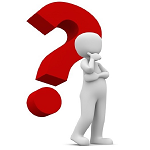
</div>

**Domanda 2**

Si considerino le osservazioni. In che modo sono utili ai fini dell'apprendimento della policy?

<div>
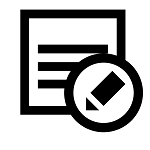
</div>

**Risposta 2**

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

## Implementazione
Seguiremo l'implementazione disponibile qui (https://pytorch-lightning.readthedocs.io/en/latest/notebooks/lightning_examples/reinforce-learning-DQN.html) con qualche modifica.

Iniziamo con delle import:

In [1]:
import os
from collections import OrderedDict, deque, namedtuple
from typing import List, Tuple, Iterator

import gym
import numpy as np
import torch
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.utilities import DistributedType
from torch import Tensor, nn
from torch.optim import Adam, Optimizer
from torch.utils.data import DataLoader
from torch.utils.data.dataset import IterableDataset

Definiamo adesso la Deep Q-Network per approssimare Q. E' un semplice MLP che prende in input le 4 osservazioni e restituisce due valori, uno per ogni azione.

In [2]:
class DQN(nn.Module):
    """Deep Q-Network. E' un semplice MLP che prende
    in input un vettore di osservazioni (lo stato) e restituisce in output
    i Q-value per le diverse azioni"""

    def __init__(self, 
                 obs_size, # dimensioni del vettore di osservazioni
                 n_actions, # numero di azioni
                 hidden_size = 128 # dimensione del livello nascosto
                ):
        super().__init__()
        # definiamo il MLP
        self.net = nn.Sequential(
            nn.Linear(obs_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, n_actions),
        )

    def forward(self, x):
        return self.net(x.float())

Testiamo la rete:

In [3]:
model = DQN(4, 2)
model(torch.zeros(1,4)).shape

torch.Size([1, 2])

Definiamo adesso una struttura per memorizzare le esperienze. Ogni esperienza è relativa a uno step di interazione di un episodio. L'esperienza per noi sarà una tupla composta da stato, azione, reward, un flag "done" che indica se dopo questa esperienza l'episodio è finito, e lo stato successivo.

In [4]:
# Una namedtuple per rappresentare una experience
Experience = namedtuple(
    "Experience",
    field_names=["state", "action", "reward", "done", "new_state"],
)

Definiamo adesso un ReplayBuffer, che sarà sostanzialmente una coda di tuple `Experience` nella quale è possibile inserire elementi e dalla quale è possibile campionare.

In [5]:
class ReplayBuffer:
    """Buffer che contine le esperienze già viste per effettuare il replay"""

    def __init__(self, capacity):
        # capacity indica la grandezza massima del buffer
        # deque è una coda accessibile da ambo i lati
        self.buffer = deque(maxlen=capacity)

    def __len__(self):
        return len(self.buffer)

    def append(self, experience):
        # permette di inserire una esperienza
        self.buffer.append(experience)

    def sample(self, batch_size):
        # campiona batch_size esperienze casualmente
        # ottiene batch_size indici senza sostituzione
        indices = np.random.choice(len(self.buffer), batch_size, replace=False)
        # preleva lista di stati, azioni, reward, booleani "done" e next_states
        states, actions, rewards, dones, next_states = zip(*(self.buffer[idx] for idx in indices))

        return ( #restituisci batch delle diverse quantità
            np.array(states),
            np.array(actions),
            np.array(rewards, dtype=np.float32),
            np.array(dones, dtype=np.bool),
            np.array(next_states),
        )

Costruiamo adesso un oggetto dataset per campionare dal replay buffer. Il dataset sarà di tipo `IterableDataset` e quindi non avrà un numero preciso di elementi. Dato che il dataset contiene un riferimento al replay buffer, questo si aggiornerà automaticamente man mano che inseriamo esperienze nel buffer.

In [6]:
class RLDataset(IterableDataset):
    """Dataset di tipo Iterable. Si tratta di un dataset 'infinito'. 
    Verrà aggiornato in automatico quando inseriremo elementi dentro il buffer"""

    def __init__(self, 
                 buffer, # replay buffer
                 sample_size = 200 # numero di memories da campionare ad ogni step
                ):
        self.buffer = buffer 
        self.sample_size = sample_size

    def __iter__(self):
        # campiona le esperienze
        states, actions, rewards, dones, new_states = self.buffer.sample(self.sample_size)
        for i in range(len(dones)): #restituisci stati, azioni, reward, done e new_states, uno ad uno
            yield states[i], actions[i], rewards[i], dones[i], new_states[i]

Definiamo ora una classe `Agent` che ci permetterà di simulare le interazioni con l'ambiente. L'agente ingloberà l'ambiente stesso e conterà un riferimento al replay buffer.

In [7]:
class Agent:
    """Questa classe implementa l'agente di reinforcement learning
    e le sue interazioni con l'ambiente"""

    def __init__(self, 
                 env, #l'ambiente di gym
                 replay_buffer #il replay buffer
                ):
        self.env = env
        self.replay_buffer = replay_buffer
        self.episodes = -1
        self.reset()

    def reset(self):
        """Resetta l'ambiente e salva lo stato corrente"""
        self.state = self.env.reset()
        self.episodes+=1

    def get_action(self, 
                   net, # la Q-Net
                   epsilon, # probabilità di effettuare una azione casuale per bilanciare exploration/exploitation
                   device # il dispositivo sul quale effettuare la computazione
                  ):
        # con probabilità epsilon
        if np.random.random() < epsilon:
            # campiona una azione casuale
            action = self.env.action_space.sample()
        else:
            # trasforma l'ultimo stato in tensore
            state = torch.tensor([self.state])

            # metti lo stato sul device corretto
            if device not in ["cpu"]:
                state = state.cuda(device)

            # ottieni i q values
            q_values = net(state)
            # campiona l'azione con q-alue più alto
            _, action = torch.max(q_values, dim=1)
            # trasforma l'azione in intero
            action = int(action.item())

        return action

    @torch.no_grad() #disabilita i gradienti
    def play_step(
        self,
        net, # la q-net
        epsilon = 0.0, # probabilità di una azione random
        device = "cpu", # il device su cui lavorare
    ):
        # ottieni l'azione per lo stato corrente
        action = self.get_action(net, epsilon, device)

        # effettua uno step dell'environment di gym
        new_state, reward, done, _ = self.env.step(action)

        # costruiamo una nuova esperienza
        exp = Experience(self.state, action, reward, done, new_state)

        # aggiungiamola al buffer
        self.replay_buffer.append(exp)

        # conserviamo il nuovo stato come corrente
        self.state = new_state
        
        if done: # se l'episodio è finito
            self.reset() #resettiamo l'ambiente
        return reward, done
    
    @torch.no_grad()
    def play_episode(self, net, epsilon=0, device = "cpu", return_frames=True):
        """Questo metodo permette di eseguire un episodio completo. E' utile per visualizzare il comportamento dell'agente."""
        self.reset()
        total_reward = 0
        frames = []
        actions = []
        for t in count():
            # ottieni l'azione per lo stato corrente
            action = self.get_action(net, epsilon, device)
            
            # effettua uno step dell'environment di gym
            new_state, reward, done, _ = self.env.step(action)
            
            # conserviamo il nuovo stato come corrente
            self.state = new_state
            
            total_reward += reward
            if return_frames:
                frames.append(self.env.render(mode='rgb_array'))
            actions.append(action)
            
            if done:
                self.reset()
                break
        return frames, actions, total_reward

Definiamo quindi il modulo di tipo `LightningModule` per effettuare il training del modello:

In [8]:
from itertools import count

class DQNLightning(LightningModule):
    def __init__(
        self,
        Agent = Agent,
        DQN = DQN,
        ReplayBuffer = ReplayBuffer,
        batch_size = 256, # il batch size con cui allenare la rete
        lr = 1e-2, # learning rate
        env = "CartPole-v0", # environment di gym
        gamma = 0.99, # iperprametro gamma
        sync_rate = 10, # ogni quanto aggiorare la target network
        replay_size = 1000, # dimensione massima del replay buffer
        warm_start_size = 1000, # quanti campioni usare per riempire il buffer all'inizio del training
        eps_last_frame = 1000, # dopo quanti frame iniziare a far decadere epsilon
        eps_start = 1.0, # epsilon iniziale
        eps_end = 0.01, # epsilon finale
        warm_start_steps = 1000, # massima reward nell'ambiente
        display_rate = 20 #ogni quanti episodi, mostrare un episodio a schermo
    ):
        super().__init__()
        self.save_hyperparameters() #salviamo gli iperparametri

        self.env = gym.make(self.hparams.env) #creiamo l'ambiente di gym
        obs_size = self.env.observation_space.shape[0] #numero di osservazioni
        n_actions = self.env.action_space.n #numero di azioni

        self.net = DQN(obs_size, n_actions) #Q-Net
        self.target_net = DQN(obs_size, n_actions) #rete target

        self.buffer = ReplayBuffer(self.hparams.replay_size) #buffer
        self.agent = Agent(self.env, self.buffer) #agente
        self.total_reward = 0 #reward totale
        self.episode_reward = 0 #reward dell'ultimo episodio
        self.populate(self.hparams.warm_start_steps) #riempie il memory buffer

    def populate(self, steps = 1000):
        for i in range(steps): # effettua 1000 step con policy random
            self.agent.play_step(self.net, epsilon=1.0)
        self.agent.episodes=0

    def forward(self, x):
        output = self.net(x)
        return output

    def dqn_mse_loss(self, batch):
        # calcola la loss MSE per allenare la rete
        states, actions, rewards, dones, next_states = batch

        # otteniamo i valori relativi alle azioni effettuate
        state_action_values = self.net(states).gather(1, actions.unsqueeze(-1)).squeeze(-1)

        with torch.no_grad():
            # stimiamo i valori degli stati futuri con la target net
            next_state_values = self.target_net(next_states).max(1)[0]
            # impostiamo a zero i valori degli ultimi step
            next_state_values[dones] = 0.0
            # scolleghiamo dal grafo computazionale
            next_state_values = next_state_values.detach()

        # calcoliamo i valori attesi degli stati
        expected_state_action_values = next_state_values * self.hparams.gamma + rewards

        # restituiamo la loss MSE tra gli stati stimati e quelli attesi
        return nn.MSELoss()(state_action_values, expected_state_action_values)

    def training_step(self, batch, batch_idx):
        device = self.get_device(batch) # otteniamo il device del batch
        epsilon = max( # calcoliamo epsilon usando il global_step corrente
            self.hparams.eps_end,
            self.hparams.eps_start - self.global_step + 1 / self.hparams.eps_last_frame,
        )

        # esegui un nuovo step in modo da continuare a riempire il buffer
        reward, done = self.agent.play_step(self.net, epsilon, device)
        self.episode_reward += reward # cumula la reward dell'episodio corrente

        # calcola la loss di training a partire dal batch
        loss = self.dqn_mse_loss(batch)

        # reshape necessario per alcuni tipi di training
        if self.trainer._distrib_type in {DistributedType.DP, DistributedType.DDP2}:
            loss = loss.unsqueeze(0)

        # se abbiamo finito
        if done:
            # imposta la reward totale
            self.total_reward = self.episode_reward
            self.episode_reward = 0 #reimposta la reward dell'episodio

        # aggiorna la target_net ogni sync_rate step
        if self.global_step % self.hparams.sync_rate == 0:
            self.target_net.load_state_dict(self.net.state_dict())

        log = {
            "total_reward": torch.tensor(self.total_reward).to(device),
            "reward": torch.tensor(reward).to(device),
            "train_loss": loss,
        }
        status = {
            "steps": torch.tensor(self.global_step).to(device),
            "total_reward": torch.tensor(self.total_reward).to(device),
        }
        
        self.log('train/loss', loss)
        self.log('train/total_reward', self.total_reward)
        self.log('train/episodes', self.agent.episodes)
        
        # ogni display_rate episodi, mostriamo un episodio completo a schermo
        if self.agent.episodes % self.hparams.display_rate == 0:
            frames, actions, total_reward = self.agent.play_episode(self.net, device=self.get_device(batch))
            vid_tensor = torch.from_numpy(np.stack(frames,0).transpose(0,3,1,2)/255).unsqueeze(0)
            self.logger.experiment.add_video('val/episode', vid_tensor, global_step=self.global_step, fps=30)
            
        return OrderedDict({"loss": loss, "log": log, "progress_bar": status})

    def configure_optimizers(self):
        # configura l'ottimizzatore
        optimizer = Adam(self.net.parameters(), lr=self.hparams.lr)
        return [optimizer]

    def __dataloader(self):
        # crea un RLDataset e lo lega al buffer
        dataset = RLDataset(self.buffer)
        dataloader = DataLoader( #costruisci il dataloader
            dataset=dataset,
            batch_size=self.hparams.batch_size,
        )
        return dataloader

    def train_dataloader(self):
        # restituisci il dataloader
        return self.__dataloader()

    def get_device(self, batch):
        # restituisce il device del batch
        return batch[0].device.index if self.on_gpu else "cpu"

Per poter visualizzare brevi video su tensorboard, installiamo `moviepy` con:

`pip install moviepy`

Effettuiamo dunque il training:

In [9]:
from pytorch_lightning.loggers import TensorBoardLogger

model = DQNLightning()

logger = TensorBoardLogger("tb_logs_rl", name="cartpole")

trainer = Trainer(
    gpus=1,
    max_epochs=10000, #facciamo training per 10000 step
    logger=logger,
    enable_progress_bar=False
)

trainer.fit(model)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name       | Type | Params
------------------------------------
0 | net        | DQN  | 898   
1 | target_net | DQN  | 898   
------------------------------------
1.8 K     Trainable params
0         Non-trainable params
1.8 K     Total params
0.007     Total estimated model params size (MB)
/home/furnari/miniconda3/envs/dl/lib/python3.6/site-packages/pytorch_lightning/trainer/data_loading.py:111: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
/home/furnari/miniconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:30: Use

Alla fine del training, su tensorboard vedremo dei grafici simili ai seguenti:

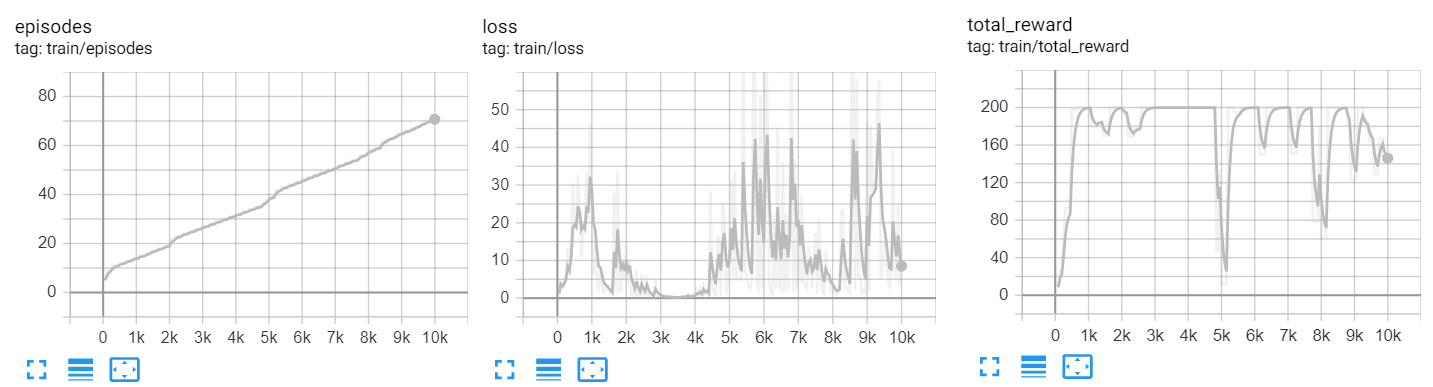

<div>
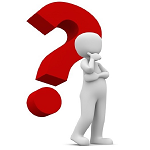
</div>

**Domanda 3**

Come mai l'andamento del numero di episodi non è perfettamente lineare rispetto all'andamento del numero di iterazioni?

<div>
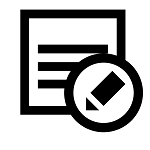
</div>

**Risposta 3**

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

<div>
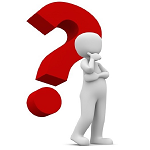
</div>

**Domanda 4**

Si commenti il grafico della total reward. Il modello sta apprendendo?

<div>
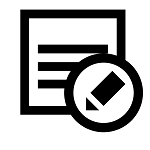
</div>

**Risposta 4**

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Inoltre, cliccando su "images", vedremo delle animazioni degli episodi mostrati durante il training:

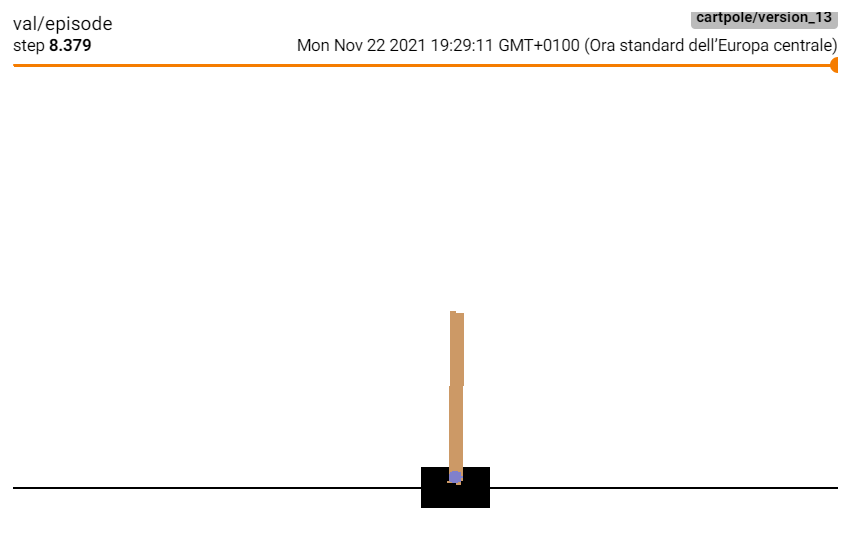

<div>
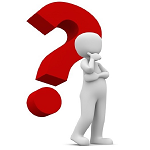
</div>

**Domanda 5**

Si confrontino gli episodi visualizzati all'inizio del training con quelli visualizzati alla fine. Ci sono delle differenze?

<div>
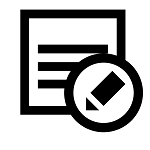
</div>

**Risposta 5**

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

## Valutazione

Per valutare le performance del modello, calcoliamo la total reward media per $100$ episodi:

In [10]:
avg_reward = 0
for _ in range(100):
    _, _, total_reward = model.agent.play_episode(model.net, return_frames=False)
    avg_reward+=total_reward
avg_reward/=100
print(avg_reward)

167.43


Confrontiamo la reward media ottenuta con quella di una policy random. Per ottenerla specificheremo `epsilon=1`:

In [11]:
avg_reward = 0
for _ in range(100):
    _, _, total_reward = model.agent.play_episode(model.net, return_frames=False, epsilon=1)
    avg_reward+=total_reward
avg_reward/=100
print(avg_reward)

23.6


## Mountain Car

Vediamo adesso un secondo esempio con il task "Mountain Car". In questo caso, l'agente comanda un carrello che deve scalare una montagna. Il motore del carrello non ha potenza sufficiente a scalare la montagna, quindi l'agente deve imparare ad andare in direzione opposta a quella del traguardo per "prendere la rincorsa".

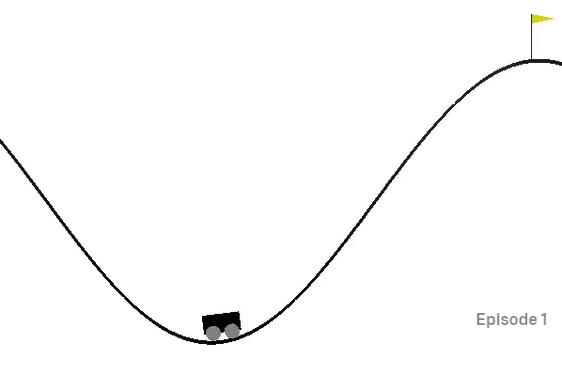

Dalla pagina del task (https://github.com/openai/gym/wiki/MountainCar-v0), vediamo che le osservazioni sono due:

<table role="table">
<thead>
<tr>
<th>Num</th>
<th>Observation</th>
<th>Min</th>
<th>Max</th>
</tr>
</thead>
<tbody>
<tr>
<td>0</td>
<td>position</td>
<td>-1.2</td>
<td>0.6</td>
</tr>
<tr>
<td>1</td>
<td>velocity</td>
<td>-0.07</td>
<td>0.07</td>
</tr>
</tbody>
</table>

Mentre le azioni disponibili sono tre:

<table role="table">
<thead>
<tr>
<th>Num</th>
<th>Action</th>
</tr>
</thead>
<tbody>
<tr>
<td>0</td>
<td>push left</td>
</tr>
<tr>
<td>1</td>
<td>no push</td>
</tr>
<tr>
<td>2</td>
<td>push right</td>
</tr>
</tbody>
</table>

L'agente riceve una reward pari a $-1$ per ogni time step, finché il carrello non raggiunge il traguardo, dopo di ché nessuna penalità viene data e l'episodio termine. Non c'è alcuna penalità per il fatto di scalare la collina sinistra, che una volta raggiunta si comporta come un muro.

<div>
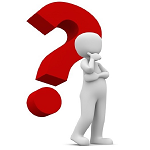
</div>

**Domanda 6**

In che modo le reward definite favoriscono l'apprendimento di una policy funzionante?

<div>
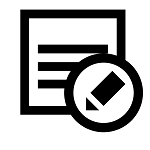
</div>

**Risposta 6**

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Possiamo affrontare il problema nuovamente con il Q-Learning, sfruttando lo stesso codice scritto per il problema del Cart Pole:

In [12]:
from pytorch_lightning.loggers import TensorBoardLogger

model = DQNLightning(env='MountainCar-v0')

logger = TensorBoardLogger("tb_logs_rl", name="mountain_car")

trainer = Trainer(
    gpus=1,
    max_epochs=10000, #facciamo training per 10000 step
    logger=logger,
    enable_progress_bar=False
)

trainer.fit(model)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name       | Type | Params
------------------------------------
0 | net        | DQN  | 771   
1 | target_net | DQN  | 771   
------------------------------------
1.5 K     Trainable params
0         Non-trainable params
1.5 K     Total params
0.006     Total estimated model params size (MB)


Alla fine del training, troveremo i seguenti log su tensorboard:

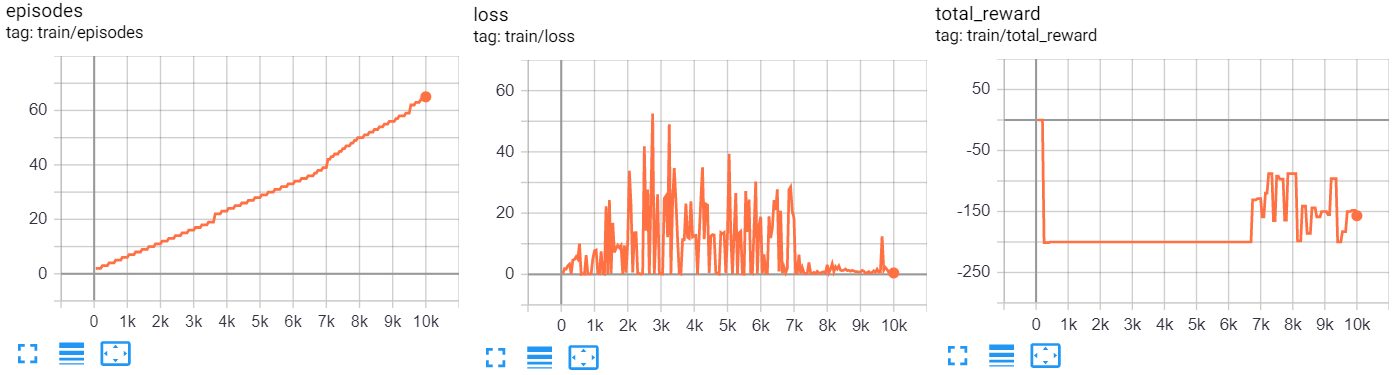

Su images, dovrebbero inoltre apparire gli episodi mostrati durante il training:

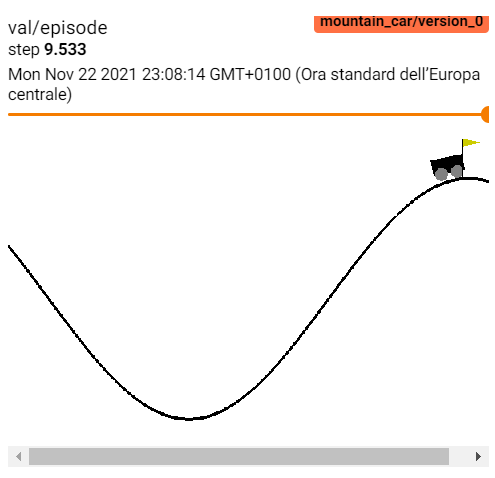

## Acrobot

Vediamo un ulteriore task di esempio, Acrobot. In questo caso l'agente comanda un braccio robotico e ha lo scopo di portarlo al di sopra della linea orizzontale nera (si veda qui: https://www.analyticsvidhya.com/blog/2021/06/acrobot-with-deep-q-learning/):

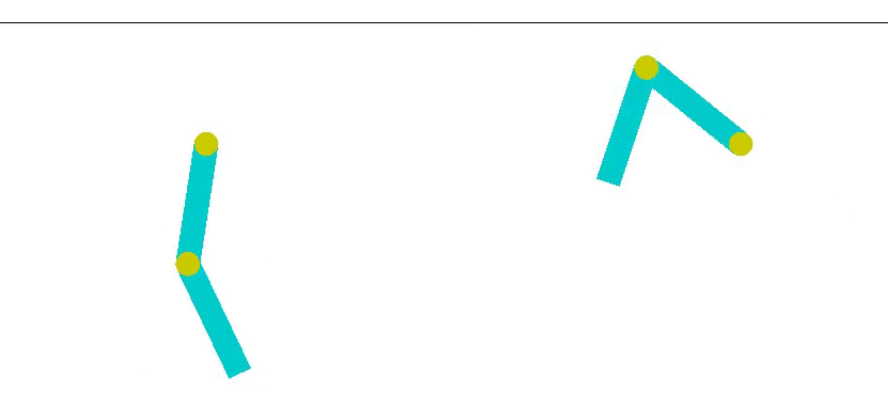

L'agente ha a disposizione tre azioni:

 * Applicare una torsione positiva;
 * Applicare una torsione negativa;
 * Non fare niente.
 
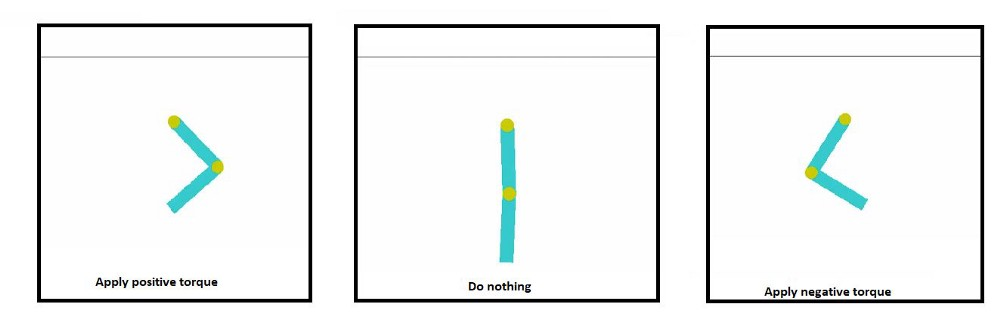

L'ambiente restituisce una reward negativa per ogni timestep, finché l'obiettivo o il numero massimo di step non vengono raggiunti.

<div>
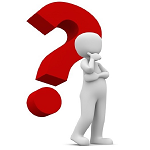
</div>

**Domanda 7**

In che modo le reward definite favoriscono l'apprendimento di una policy funzionante?

<div>
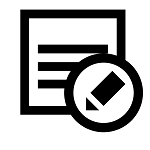
</div>

**Risposta 7**

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Anche in questo caso, utilizzeremo lo stesso codice visto per i task precedenti:

In [13]:
from pytorch_lightning.loggers import TensorBoardLogger

model = DQNLightning(env='Acrobot-v1')

logger = TensorBoardLogger("tb_logs_rl", name="acrobot")

trainer = Trainer(
    gpus=1,
    max_epochs=10000, #facciamo training per 10000 step
    logger=logger,
    enable_progress_bar=False
)

trainer.fit(model)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name       | Type | Params
------------------------------------
0 | net        | DQN  | 1.3 K 
1 | target_net | DQN  | 1.3 K 
------------------------------------
2.6 K     Trainable params
0         Non-trainable params
2.6 K     Total params
0.010     Total estimated model params size (MB)


Alla fine del training, troveremo i seguenti log su tensorboard:

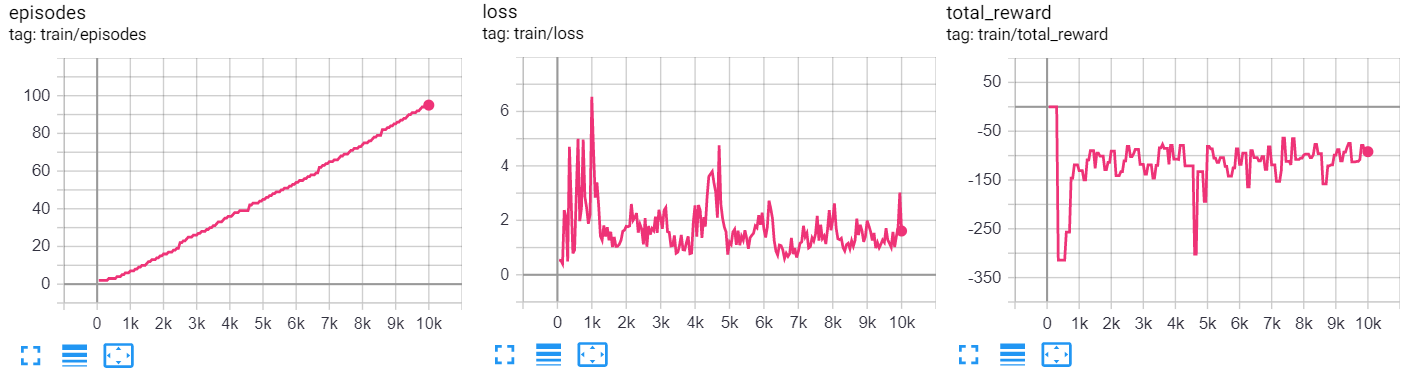

Alla fine del training, su "images" troveremo degli esempi di episodi mostrati durante il training:

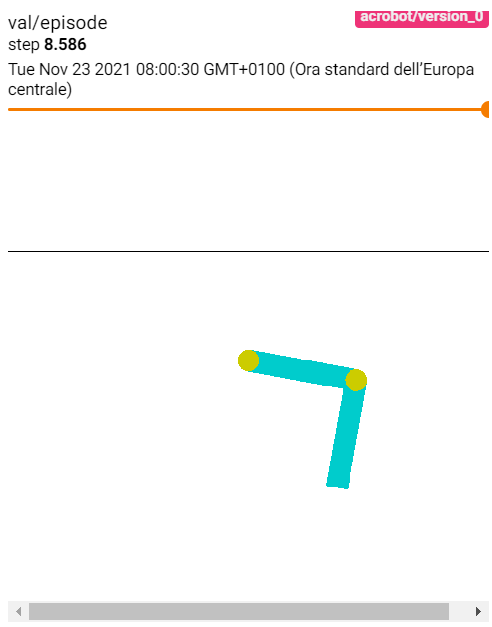

# Esercizi

<div>
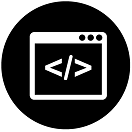
</div>

**Esercizio 1**

Si provi a ottimizzare l'architettura della rete che risolve il problema cartpole per migliorare le prestazioni dell'algoritmo. Si riesce far convergere l'algoritmo in un numero inferiore di episodi?

<div>
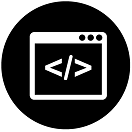
</div>

**Esercizio 2**

Si ripeta l'esercizio precedente con il problema MountainCar.

<div>
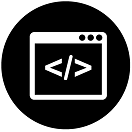
</div>

**Esercizio 3**

Si ripeta l'esercizio precedente con il problema Acrorobot.

<div>
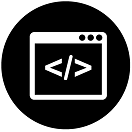
</div>

**Esercizio 4**

Si segua il tutorial disponibile a questo url (https://pytorch.org/tutorials/intermediate/mario_rl_tutorial.html) per implementare un agente di reinforcement learning capace di giocare a Super Mario.

<div>
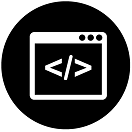
</div>

**Esercizio 5**

Si rifattorizzi il codice dell'esercizio precedente in modo da usare PyTorch Lightning e seguendo una struttura simile a quella vista in questo laboratorio.

# References

 * Documentazione di PyTorch. http://pytorch.org/docs/stable/index.html
 * Documentazione di PyTorch Lightning. https://www.pytorchlightning.ai/
 * Documentazione di Gym. https://gym.openai.com/docs/
 * Tutorial su deep Q-Learning e PyTorch. https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
 * Tutorial su deep Q-Learning e Lightning. https://pytorch-lightning.readthedocs.io/en/latest/notebooks/lightning_examples/reinforce-learning-DQN.html
 * Tutorial su deep reinforcement learning e Super Mario. https://pytorch.org/tutorials/intermediate/mario_rl_tutorial.html
 * Acrobot con Deep Q-Learning. https://www.analyticsvidhya.com/blog/2021/06/acrobot-with-deep-q-learning/